# KL Divergence, playing with numbers

In [278]:
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

import matplotlib.pyplot as plt
import random
%matplotlib inline

We can think of the information contatined in a distribution as $$H(x)=\sum_{i=0}^{n} p(x_i) log(\frac{1}{p(x_i)})$$ where the $H(x)$ gives the amount of bits or questions we need to ask on average in order to find out what the next symbol will be.

From what I understand, the KL divergence is a way of expressing the amount of information we loose when we approximate a distribution with another. We can think of it as "how many bits of information do I expect to loose?". We will always loose some or no bits of information since a loss of no bits means the distributions are equal.
$$D_{KL}(p||q) = \sum_{i=0}^{n} p(x_i)\cdot(log(p(x_i)) - log(q(x_i)))$$

<BarContainer object of 4 artists>

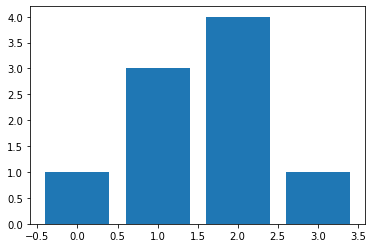

In [350]:
observed = np.array([1,3,4,1])
values = np.arange(len(observed))
plt.bar(values,observed)

We can convert observed numbers to probabilities by dividing each value by the total sum. We can use the exponential function to accentuate dominant values.

In [6]:
def softmax(x):
    e_x = np.exp(x)
    return e_x/np.sum(e_x)

In [37]:
def normalize(x):
    return x/np.sum(x)

In [120]:
def entropy(p):
    p = np.array(p)
    return -np.sum(p*np.log2(p, where=p!=0))

In [126]:
def self_information(p):
    p = np.array(p)
    return -np.log2(p, where=p!=0)

In [240]:
def KL_divergence(p, q):
    p = np.array(p)
    q = np.array(q)
    p_mask = p!=0
    q_mask = q!=0
    mask = p_mask & q_mask
    return np.sum(p[mask]*(np.log2(p[mask])-np.log2(q[mask])))

In [140]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [170]:
def cross_entropy(p,q):
    return entropy(p) + KL_divergence(p, q)

In [339]:
def perplexity(H):
    return 2**H

### The effect of Softmax

<BarContainer object of 4 artists>

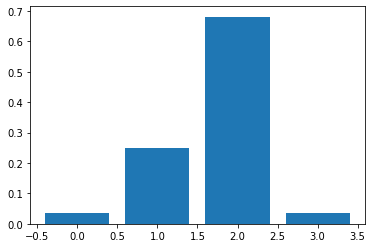

In [144]:
p_obs = softmax(observed)
plt.bar(values,p_obs)

<BarContainer object of 4 artists>

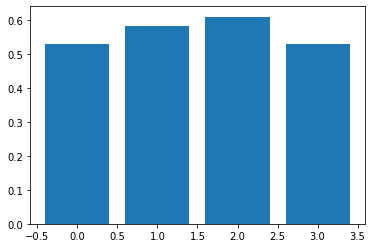

In [145]:
p_sig = sigmoid(normalize(observed))
plt.bar(values,p_sig)

In [344]:
p = [7,0.1,1,0.1]
q = [100,1,100,1]

p = normalize(p)
q = normalize(q)
print(f"normalised p: {p}")
print(f"normalised q: {q}")

normalised p: [0.854 0.012 0.122 0.012]
normalised q: [0.495 0.005 0.495 0.005]


In [345]:
print("entropy of p:",entropy(p))
print("entropy of q:",entropy(q))

entropy of p: 0.7201240517519705
entropy of q: 1.0801360473312753


In [346]:
print("self information of p:",self_information(normalize(q)))

self information of p: [1.014 7.658 1.014 7.658]


In [347]:
KL_divergence(p,q)

0.45627651414643444

In [348]:
cross_entropy(p,q)

1.176400565898405

In [349]:
perplexity(entropy(q))

2.114235445867362

## Making a language model

In [327]:
class LanguageGenerator():
    def __init__(self):
        self.vocab = ["A","B"]
    
    def generate(self, 
                 n, seq=""):
        for i in range(n):
            if seq =="":
                seq += random.choice(self.vocab)
            elif seq[-1] == "A":
                seq += np.random.choice(self.vocab, 1, p=normalize([0.05,0.45]))[0]
            elif seq[-1] == "B":
                seq += np.random.choice(self.vocab, 1, p=normalize([0.45,0.05]))[0]
        return seq

In [328]:
language = LanguageGenerator()

In [330]:
language.generate(50)

'ABABABABABABAABBABABABABABAABABABABABABAABABAABABA'

In [331]:
normalize([[1,9],[9,1]])

array([[0.050, 0.450],
       [0.450, 0.050]])